In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [528]:
df = pd.read_csv('dataset\Raw_data_1Hr_2015_2024_Mandir_Marg_Delhi_DPCC.csv')

In [529]:
df.head()

Timestamp  PM2.5  PM10  NO  NO2  NH3  SO2  CO  Ozone  AT  RH  WS  WD  \
0  01-01-2015 0.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
1  01-01-2015 1.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
2  01-01-2015 2.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
3  01-01-2015 3.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   
4  01-01-2015 4.00    NaN   NaN NaN  NaN  NaN  NaN NaN    NaN NaN NaN NaN NaN   

   SR  BP  
0 NaN NaN  
1 NaN NaN  
2 NaN NaN  
3 NaN NaN  
4 NaN NaN

In [530]:
df.columns

Index(['Timestamp', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
       'AT', 'RH', 'WS', 'WD', 'SR', 'BP'],
      dtype='object')

In [531]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %H.%M")

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  87672 non-null  datetime64[ns]
 1   PM2.5      76973 non-null  float64       
 2   PM10       77234 non-null  float64       
 3   NO         75595 non-null  float64       
 4   NO2        76555 non-null  float64       
 5   NH3        75934 non-null  float64       
 6   SO2        74546 non-null  float64       
 7   CO         75144 non-null  float64       
 8   Ozone      75821 non-null  float64       
 9   AT         77414 non-null  float64       
 10  RH         77508 non-null  float64       
 11  WS         78462 non-null  float64       
 12  WD         77639 non-null  float64       
 13  SR         78021 non-null  float64       
 14  BP         78037 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 10.0 MB


In [533]:
df.isna().sum()

Timestamp        0
PM2.5        10699
PM10         10438
NO           12077
NO2          11117
NH3          11738
SO2          13126
CO           12528
Ozone        11851
AT           10258
RH           10164
WS            9210
WD           10033
SR            9651
BP            9635
dtype: int64

In [534]:
df.describe()

Timestamp         PM2.5          PM10            NO  \
count                87672  76973.000000  77234.000000  75595.000000   
mean   2020-01-01 11:30:00    100.399404    183.924109     30.276559   
min    2015-01-01 00:00:00      0.270000      0.170000      0.060000   
25%    2017-07-02 05:45:00     37.500000     95.000000      3.770000   
50%    2020-01-01 11:30:00     70.670000    157.000000     11.160000   
75%    2022-07-02 17:15:00    134.750000    243.500000     35.190000   
max    2024-12-31 23:00:00    996.000000    992.000000    498.400000   
std                    NaN     92.457759    122.202545     48.371986   

                NO2           NH3           SO2           CO         Ozone  \
count  76555.000000  75934.000000  74546.000000  75144.00000  75821.000000   
mean      56.578669     27.399659     11.598617      1.22733     26.411646   
min        0.240000      0.100000      0.030000      0.00000      0.020000   
25%       34.880000     15.580000      6.133333      0.64000      7.450000   
50%       50.480000     22.280000      9.720000      0.92000     14.300000   
75%       71.865000     34.400000     14.280000      1.42000     32.560000   
max      434.430000    282.700000    190.100000     49.62000    368.720000   
std       31.514481     17.446663      9.320583      1.24745     31.622872   

                 AT            RH            WS            WD            SR  \
count  77414.000000  77508.000000  78462.000000  77639.000000  78021.000000   
mean      24.017836     62.234490      1.132568    220.520490     94.616611   
min        0.100000      1.030000      0.080000      0.030000      0.000000   
25%       17.300000     44.580000      0.320000    180.565000      5.330000   
50%       25.120000     65.500000      0.920000    237.125000     15.425000   
75%       30.030000     81.900000      1.720000    264.550000    157.020000   
max       49.800000    100.000000     17.990000    349.320000    621.580000   
std        9.033464     22.377142      0.868777     58.540136    130.222565   

                 BP  
count  78037.000000  
mean     906.180131  
min      732.350000  
25%      737.000000  
50%      977.200000  
75%      985.750000  
max     1000.225000  
std      112.910540

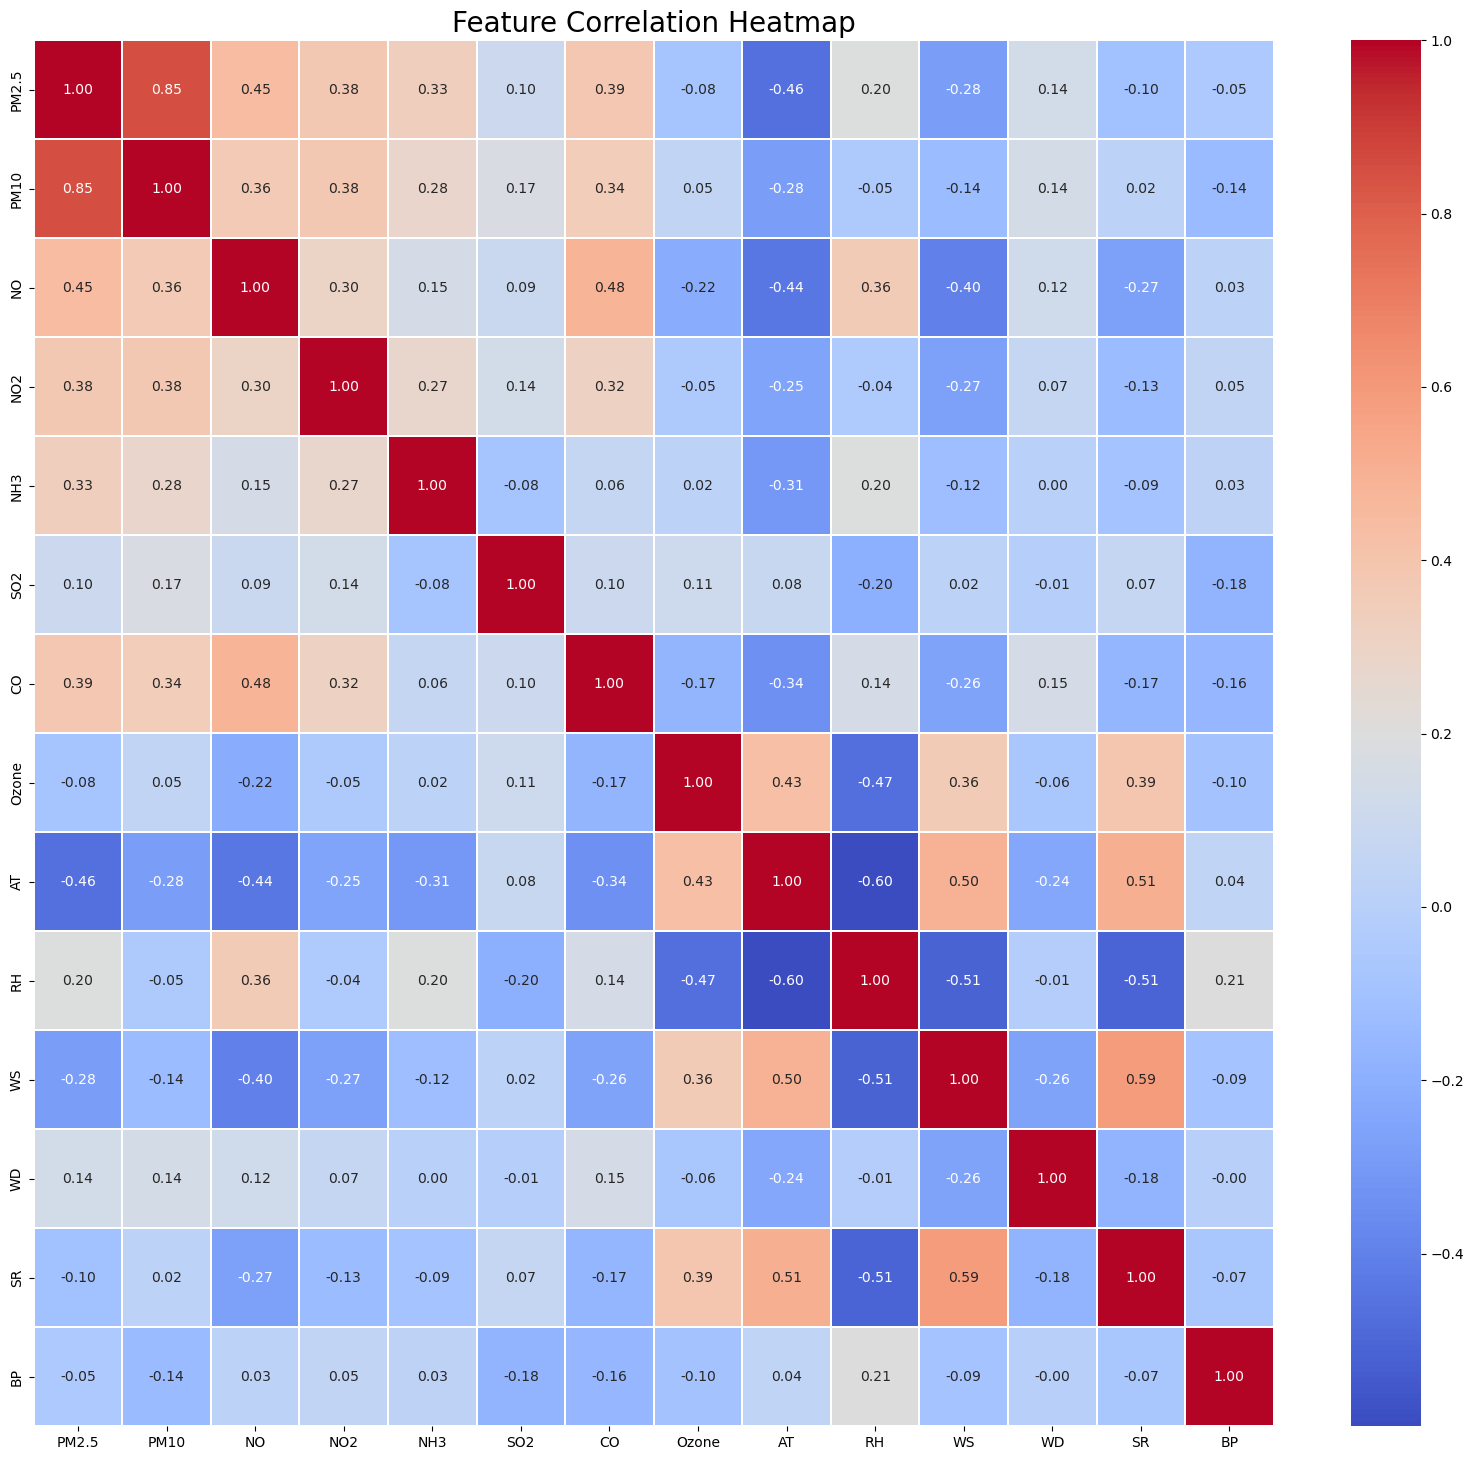

In [535]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()

In [536]:
# PM2.5 trend
fig = px.line(df, x='Timestamp', y='PM2.5', title='PM2.5 trend')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.update_layout(
    width=1200,   # try 1000–1600 depending on your screen
    height=600
)
fig.show()

In [537]:
df.isna().sum()

Timestamp        0
PM2.5        10699
PM10         10438
NO           12077
NO2          11117
NH3          11738
SO2          13126
CO           12528
Ozone        11851
AT           10258
RH           10164
WS            9210
WD           10033
SR            9651
BP            9635
dtype: int64

### Split

In [538]:
# sort by time
df = df.sort_values("Timestamp").reset_index(drop=True)

# time-based split (80% train, 20% test)
split_idx = int(len(df) * 0.8)

train_df = df.iloc[:split_idx].copy()
test_df  = df.iloc[split_idx:].copy()


In [539]:
train_df.shape

(70137, 15)

In [540]:
test_df.shape

(17535, 15)

In [541]:
train_df.isna().sum()

Timestamp        0
PM2.5         8721
PM10          8797
NO           10862
NO2           9919
NH3          10500
SO2          11188
CO           10930
Ozone        10187
AT            8597
RH            7706
WS            7551
WD            8367
SR            7456
BP            7760
dtype: int64

In [542]:
test_df.isna().sum()

Timestamp       0
PM2.5        1978
PM10         1641
NO           1215
NO2          1198
NH3          1238
SO2          1938
CO           1598
Ozone        1664
AT           1661
RH           2458
WS           1659
WD           1666
SR           2195
BP           1875
dtype: int64

### Missing value Imputation

In [543]:
#doing separately due to data leakage
train_df = train_df.interpolate(method='linear', limit=3) #if do linear interpolation for both train test then data leakage

# for test: only forward-fill (no future access)
test_df = test_df.ffill(limit=3)

In [544]:
# train_df["PM25_missing"] = train_df["PM2.5"].isna().astype(int)
# test_df["PM25_missing"]  = test_df["PM2.5"].isna().astype(int)

# ## not so much improvement with this

In [545]:
train_df.isna().sum()

Timestamp       0
PM2.5        7526
PM10         7640
NO           9353
NO2          8586
NH3          9077
SO2          9516
CO           9103
Ozone        8741
AT           7994
RH           7113
WS           6965
WD           7785
SR           6862
BP           7154
dtype: int64

In [546]:
test_df.isna().sum()

Timestamp       0
PM2.5        1192
PM10         1046
NO            974
NO2           970
NH3          1011
SO2          1117
CO           1102
Ozone        1127
AT           1484
RH           2052
WS           1476
WD           1480
SR           1706
BP           1695
dtype: int64

### Now Training Prophet Model(only for train)

In [547]:
# prophet_train = train_df[["Timestamp", "PM2.5"]].rename(
# columns={"Timestamp": "ds", "PM2.5": "y"}
# )

In [548]:
# prophet_train.head()

In [549]:
# prophet_train.tail()

In [550]:
# from prophet import Prophet
   
# prophet = Prophet(
#     daily_seasonality=True,
#     weekly_seasonality=True,
#     yearly_seasonality=True
# )

# prophet.fit(prophet_train)


### For LightGBM

In [551]:
target = "PM2.5"

feature_cols = [
    col for col in train_df.columns
    if col not in ["PM2.5", "Timestamp"]
]

X_train = train_df[feature_cols]
y_train = train_df[target]

X_test  = test_df[feature_cols]
y_test  = test_df[target]


In [552]:
feature_cols

['PM10',
 'NO',
 'NO2',
 'NH3',
 'SO2',
 'CO',
 'Ozone',
 'AT',
 'RH',
 'WS',
 'WD',
 'SR',
 'BP']

In [553]:
X_train.shape

(70137, 13)

In [554]:
y_train.shape

(70137,)

In [555]:
X_test.shape

(17535, 13)

In [556]:
y_test.shape

(17535,)

In [557]:
#LightGBM TRAIN ONLY
import lightgbm as lgb

model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

   

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 70137, number of used features: 13
[LightGBM] [Info] Start training from score 90.100807


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
              random_state=42, subsample=0.8)

In [558]:
preds = model.predict(X_test)

In [559]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Find indices where y_test actually has data
valid_idx = ~np.isnan(y_test)

# Calculate metrics only on these valid points
mae = mean_absolute_error(y_test[valid_idx], preds[valid_idx])
mse = mean_squared_error(y_test[valid_idx], preds[valid_idx])
rmse = np.sqrt(mse)
r2 = r2_score(y_test[valid_idx], preds[valid_idx])

print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

#with ffill for test linear interpolate for train with limit 3
# with nan indicator as well


MAE  : 23.9724
MSE  : 1504.5463
RMSE : 38.7885
R²   : 0.8254


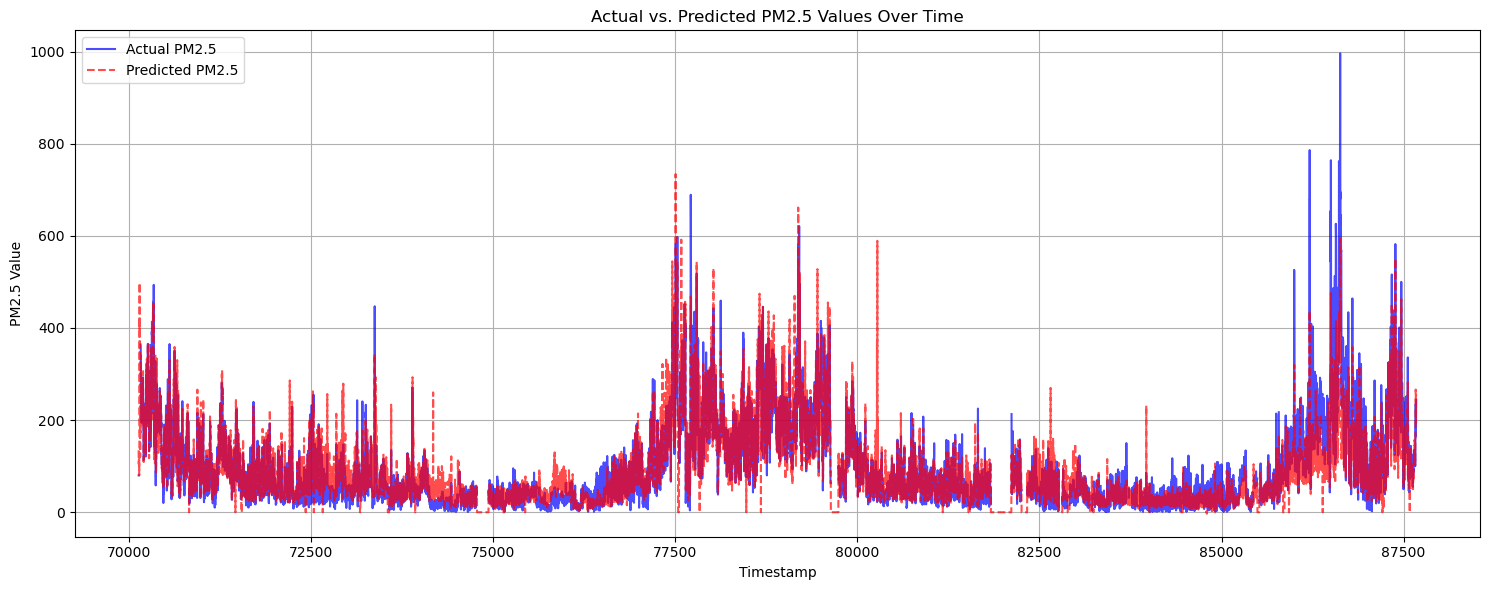

In [560]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual PM2.5', color='blue', alpha=0.7)
plt.plot(y_test.index, preds, label='Predicted PM2.5', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs. Predicted PM2.5 Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [561]:
import plotly.graph_objects as go
import pandas as pd

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Rebuild y_test dataframe with correct timestamps
y_test_df = pd.DataFrame({
    'Timestamp': df.loc[y_test.index, 'Timestamp'].values
        if y_test.index.isin(df.index).all()
        else df['Timestamp'].iloc[-len(y_test):].values,
    'Actual': y_test.values,
    'Predicted': preds
})

# Plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=y_test_df['Timestamp'],
        y=y_test_df['Actual'],
        mode='lines',
        name='Actual PM2.5',
        line=dict(color='blue'),
        opacity=0.7
    )
)

fig.add_trace(
    go.Scatter(
        x=y_test_df['Timestamp'],
        y=y_test_df['Predicted'],
        mode='lines',
        name='Predicted PM2.5',
        line=dict(color='red', dash='dash'),
        opacity=0.7
    )
)

fig.update_layout(
    title='Actual vs Predicted PM2.5 Over Time',
    xaxis_title='Timestamp',
    yaxis_title='PM2.5 Value',
    width=1200,
    height=600,
    template='plotly_white'
)

fig.update_xaxes(
    type='date',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ]
    )
)

fig.show()


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

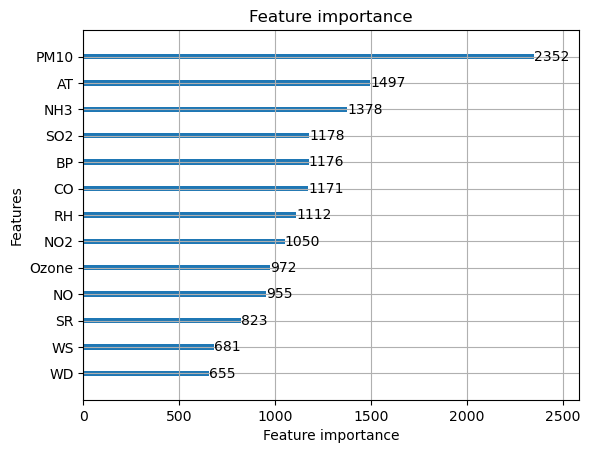

In [562]:
lgb.plot_importance(model, max_num_features=15)